## **CLASSIFICATION of Diabetic Retinopathy using CUSTOM CNN and TRANSFER LEARNING**

![image.png](./results/thumbnail.png)




In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# paths of different splited folders 
train_dir = "drp/dataset/train"
val_dir   = "drp/dataset/val"
test_dir  = "drp/dataset/test"

# Data augmentation generating multiple copies to improve generality
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation & test data: only rescaling
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Train set
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Validation set
val_set = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Test set
test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)


Found 2573 images belonging to 5 classes.
Found 549 images belonging to 5 classes.
Found 555 images belonging to 5 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_set.num_classes, activation='softmax')  # Output layer
])


C:\Users\Shreenandan Sahu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [6]:
history = model.fit(
    train_set,
    validation_data=val_set,
    epochs=15
)


C:\Users\Shreenandan Sahu\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.5655 - loss: 1.1710 - val_accuracy: 0.6794 - val_loss: 0.8975
Epoch 2/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 51s 628ms/step - accuracy: 0.6871 - loss: 0.9310 - val_accuracy: 0.7013 - val_loss: 0.8309
Epoch 3/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 48s 595ms/step - accuracy: 0.6895 - loss: 0.9105 - val_accuracy: 0.7195 - val_loss: 0.8031
Epoch 4/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 48s 587ms/step - accuracy: 0.6980 - loss: 0.8675 - val_accuracy: 0.7213 - val_loss: 0.7790
Epoch 5/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 49s 599ms/step - accuracy: 0.7038 - loss: 0.8520 - val_accuracy: 0.7213 - val_loss: 0.7935
Epoch 6/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 49s 604ms/step - accuracy: 0.7101 - loss: 0.8530 - val_accuracy: 0.7158 - val_loss: 0.7932
Epoch 7/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 52s 646ms/step - accuracy: 0.7058 - loss: 0.8674 - val_accuracy: 0.7213 - val_loss: 0.7753
Epoch 8/15
81/81 ━━━━━━━━━━━━━━━━━━━━ 50s 610ms/step - accuracy: 0.7077 - loss: 0.8615 - val_accura

In [7]:
test_loss, test_acc = model.evaluate(test_set)
print(f"Test Accuracy: {test_acc:.2f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 317ms/step - accuracy: 0.7117 - loss: 0.8071
Test Accuracy: 0.71


In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels
y_true = test_set.classes  

# Get predicted labels
y_pred_prob = model.predict(test_set)  
y_pred = np.argmax(y_pred_prob, axis=1)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step


In [9]:
cm = confusion_matrix(y_true, y_pred)


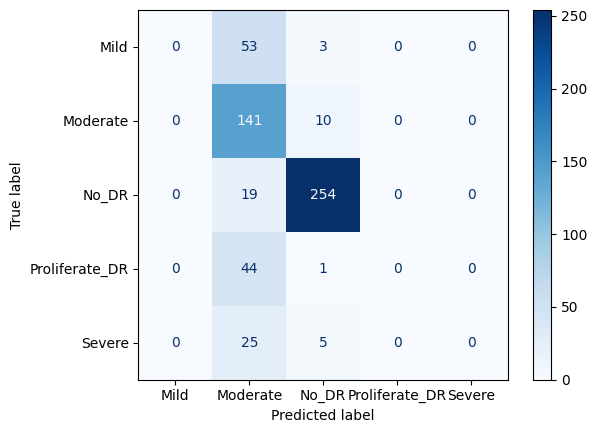

In [10]:
import matplotlib.pyplot as plt

labels = list(test_set.class_indices.keys())  # class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [11]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=labels))


                precision    recall  f1-score   support

          Mild       0.00      0.00      0.00        56
      Moderate       0.50      0.93      0.65       151
         No_DR       0.93      0.93      0.93       273
Proliferate_DR       0.00      0.00      0.00        45
        Severe       0.00      0.00      0.00        30

      accuracy                           0.71       555
     macro avg       0.29      0.37      0.32       555
  weighted avg       0.59      0.71      0.63       555



C:\Users\Shreenandan Sahu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shreenandan Sahu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Shreenandan Sahu\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo